In [1]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Set paths to your dataset directory
dataset_path_train = "C:/Users/KIIT/Downloads/archive (1)/chest_xray/train"
dataset_path_val = "C:/Users/KIIT/Downloads/archive (1)/chest_xray/val"
dataset_path_test = "C:/Users/KIIT/Downloads/archive (1)/chest_xray/test"

# Load the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path_train,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

# Load the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path_val,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

# Load the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path_test,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

# Normalize images (0-1 range)
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Cache and prefetch for faster data loading
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Check the shape of data batches
for image_batch, label_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 2)


In [5]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

# Input shape for our images
input_shape = (224, 224, 3)

# Load the pre-trained DenseNet-121 as the base model
base_model = DenseNet121(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the base model layers during initial training
base_model.trainable = False

# Define the custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Perform global average pooling
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(256, activation='relu')(x)  # Add a dense layer
x = Dropout(0.5)(x)  # Dropout layer again
predictions = Dense(2, activation='softmax')(x)  # Final classification layer

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,300,418 (27.85 MB)

 Trainable params: 262,914 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.8007 - loss: 0.5007 - val_accuracy: 0.6875 - val_loss: 0.6054
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.8946 - loss: 0.2417 - val_accuracy: 0.6875 - val_loss: 0.5582
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.9097 - loss: 0.2229 - val_accuracy: 0.6875 - val_loss: 0.5198
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.9138 - loss: 0.2075 - val_accuracy: 0.7500 - val_loss: 0.5167
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9160 - loss: 0.1899 - val_accuracy: 0.6875 - val_loss: 0.6023


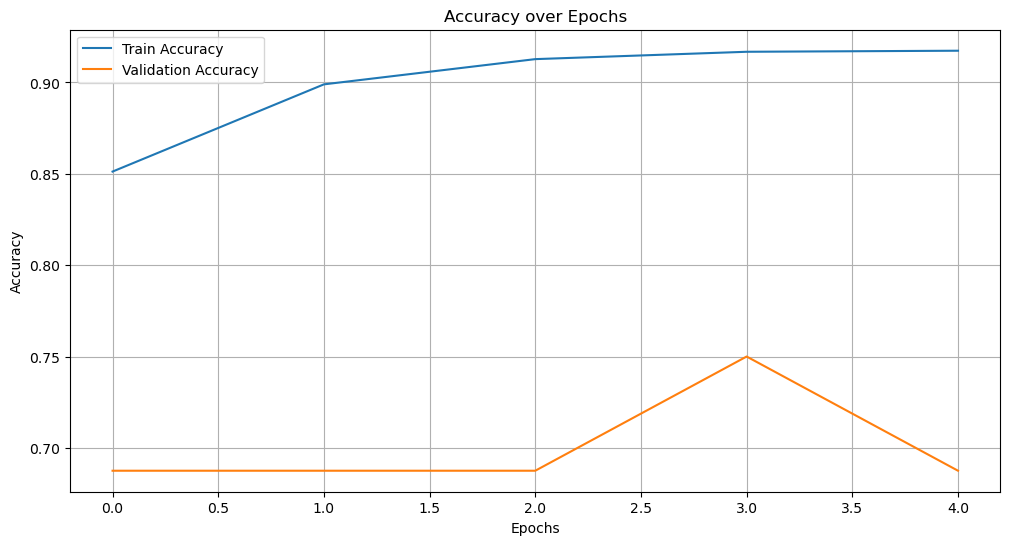

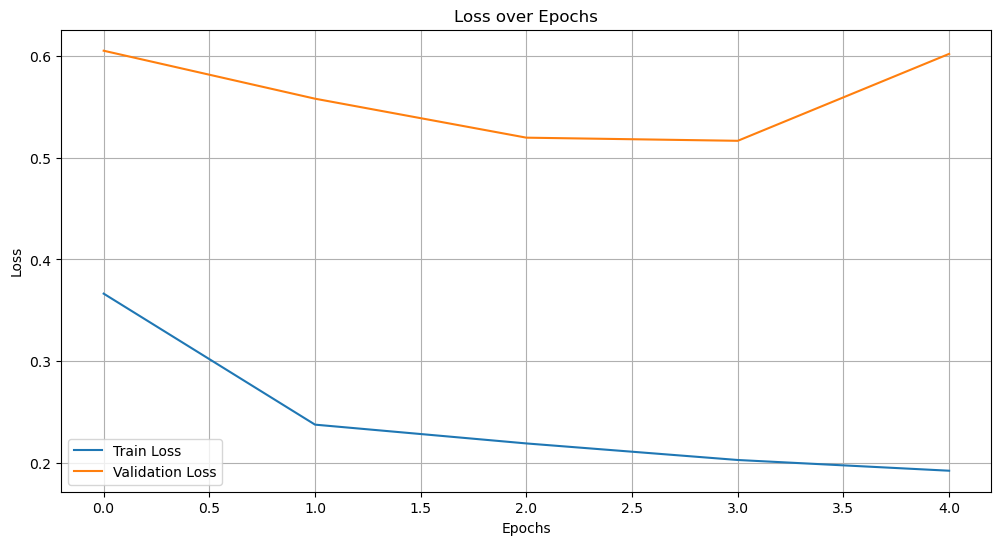

In [7]:
# Train the model
history = model.fit(
    train_ds,
    epochs=5,  # Set the number of epochs you want
    validation_data=val_ds,
    batch_size=32
)

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [19]:
# Define dataset directories
base_path = "C:/Users/KIIT/Downloads/archive (1)/chest_xray"
train_dir = base_path + "/train"
val_dir = base_path + "/val"
test_dir = base_path + "/test"


In [21]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define dataset directories
base_path = "C:/Users/KIIT/Downloads/archive (1)/chest_xray"
train_dir = base_path + "/train"
val_dir = base_path + "/val"
test_dir = base_path + "/test"

# Create training, validation, and test datasets with class names
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"  # Use categorical encoding
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

# Extract class names
class_names = train_ds.class_names  # Extract class names from the train_ds

# Normalize the datasets as before
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

print(f"Class names: {class_names}")


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Class names: ['NORMAL', 'PNEUMONIA']


In [23]:
print("Classes detected:", class_names)


Classes detected: ['NORMAL', 'PNEUMONIA']


In [25]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

# Create DenseNet model
def create_densenet_model():
    # Use the pre-trained DenseNet121 from Keras Applications
    base_model = DenseNet121(input_shape=(224, 224, 3), 
                              weights='imagenet', 
                              include_top=False)  # Exclude the classification layer
    base_model.trainable = False  # Freeze the base model for transfer learning

    # Build the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(2, activation='softmax')  # Output layer with 2 classes
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Instantiate the model
model = create_densenet_model()

# Summary of the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,300,418 (27.85 MB)

 Trainable params: 262,914 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - accuracy: 0.8310 - loss: 0.6750 - val_accuracy: 0.6875 - val_loss: 0.6742
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9399 - loss: 0.1977 - val_accuracy: 0.6875 - val_loss: 0.6373
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9467 - loss: 0.1681 - val_accuracy: 0.6875 - val_loss: 0.5632
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9568 - loss: 0.1463 - val_accuracy: 0.6875 - val_loss: 0.5959
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9616 - loss: 0.1334 - val_accuracy: 0.7500 - val_loss: 0.5042
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.9635 - loss: 0.1269 - val_accuracy: 0.8125 - val_loss: 0.3730
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.9622 - loss: 0.1233 - val_accuracy: 0.7500 - val_loss: 0.3553
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9693 - loss: 0.1127 - val_accu

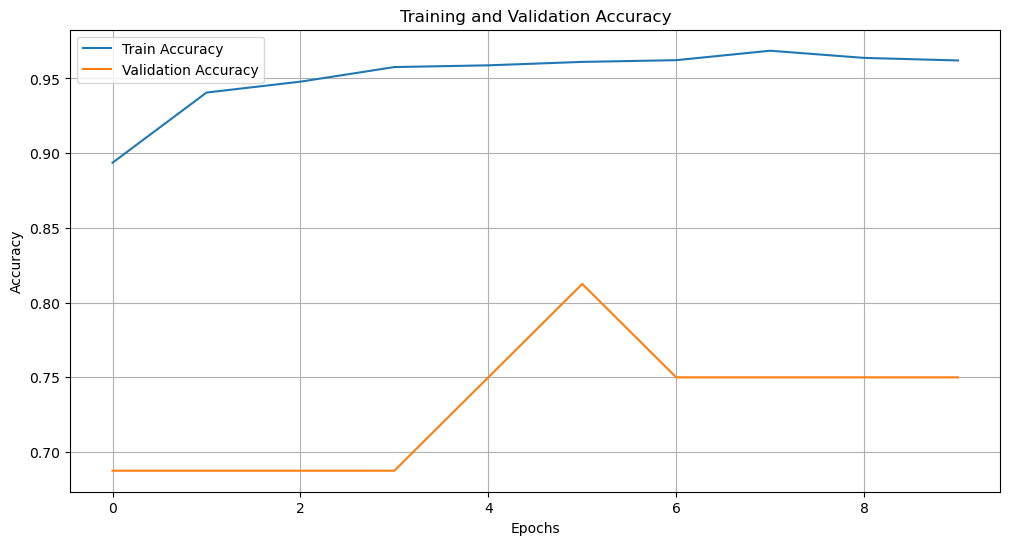

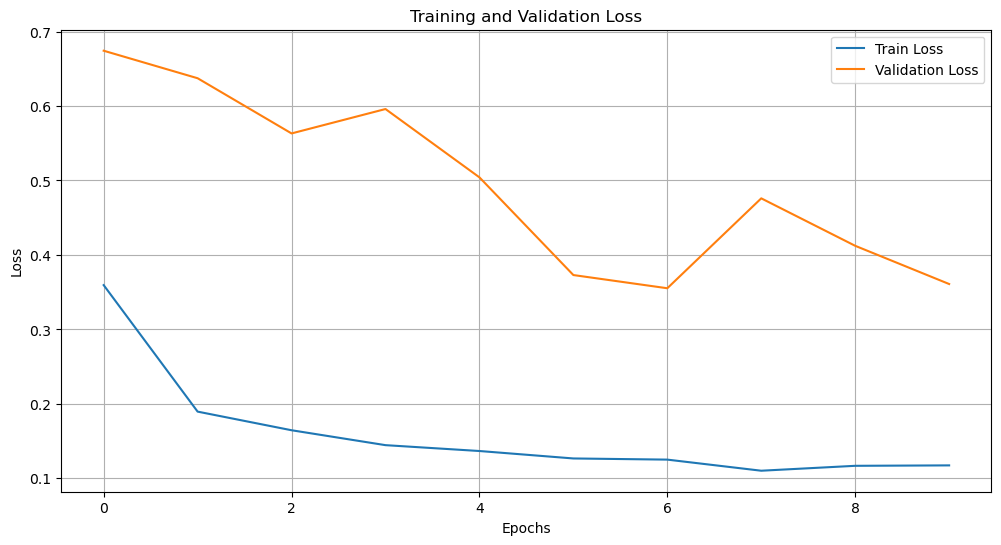

In [27]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # You can change epochs depending on resources
    class_weight={0: 1.0, 1: 2.0}  # Adjust weights due to class imbalance
)

# Plot training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Obtain predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA'])
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8212 - loss: 0.5669
Test Accuracy: 0.8381410241127014
Test Loss: 0.5043537020683289
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.59      0.73       234
   PNEU

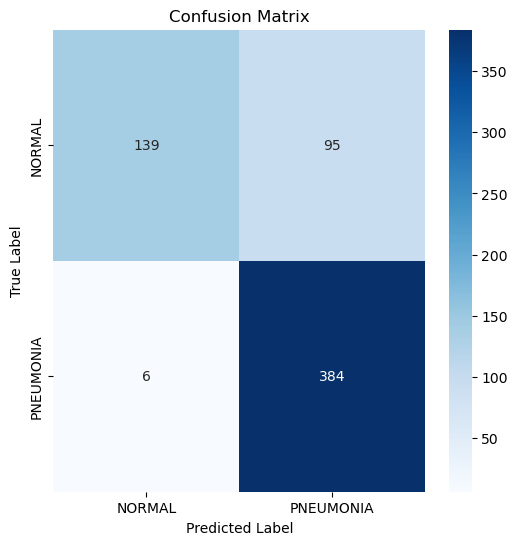

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix using Seaborn
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step


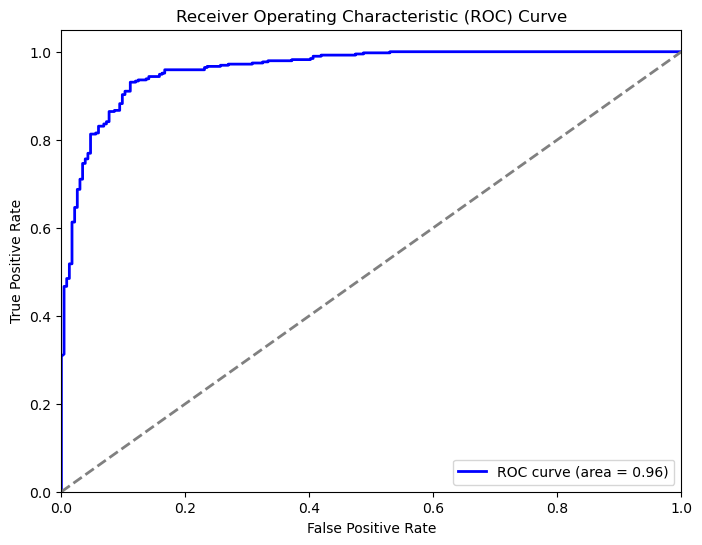

In [33]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, model.predict(test_ds)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [37]:
# Save the model in the newer Keras format
model.save("model_densenet.keras")